In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path('..').resolve()))
sys.path.append(str(Path('../..').resolve()))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta

from fmpy import simulate_fmu

from devs_fmu.bouncing_ball import BouncingBall
from devs_fmu.simulator import simulator

from config import REFERENCE_FMUS_DIR

In [3]:
fmu_path = REFERENCE_FMUS_DIR / '2.0/BouncingBall.fmu'

In [4]:
def simulate_with_fmpy_builtin_simulate():
    result = simulate_fmu(
        filename=fmu_path,
        stop_time=3,
        fmi_type='CoSimulation'
    )
    
    return result

def plot_height_of_fmpy_builtin_simulate(result):
    time_list = []
    height_list = []
    for row in result:
        time_list.append(row[0])
        height_list.append(row[1])

    plt.plot(time_list, height_list)
    plt.show()

def plot_velocity_of_fmpy_builtin_simulate(result):
    time_list = []
    velocity_list = []
    for row in result:
        time_list.append(row[0])
        velocity_list.append(row[2])
        
    plt.plot(time_list, velocity_list)
    plt.show()

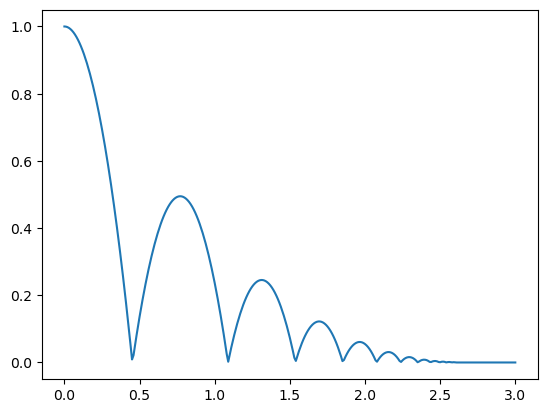

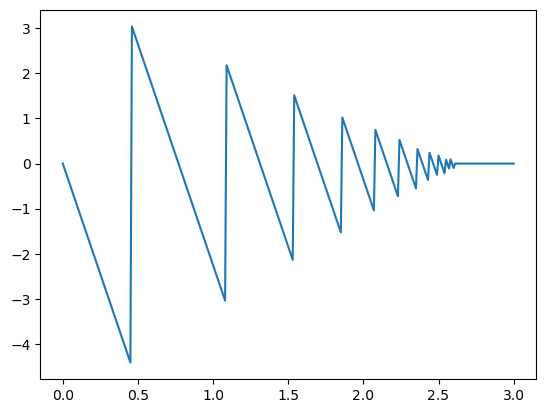

In [5]:
result = simulate_with_fmpy_builtin_simulate()
plot_height_of_fmpy_builtin_simulate(result)
plot_velocity_of_fmpy_builtin_simulate(result)

In [6]:
def simulate_with_devs(step_size):
    simulator.reset()
    m = BouncingBall(fmu_path)
    
    time_list = np.arange(0, 3, step_size)
    height_list = []
    velocity_list = []
    
    for time in time_list:
        height_list.append(m.get_height())
        velocity_list.append(m.get_velocity())
        simulator.advance(timedelta(seconds=step_size))
    
    return time_list, height_list, velocity_list

def plot_height_of_simulate_with_devs(time_list, height_list):
    plt.plot(time_list, height_list)
    plt.show()

def plot_velocity_of_simulate_with_devs(time_list, velocity_list):
    plt.plot(time_list, velocity_list)
    plt.show()

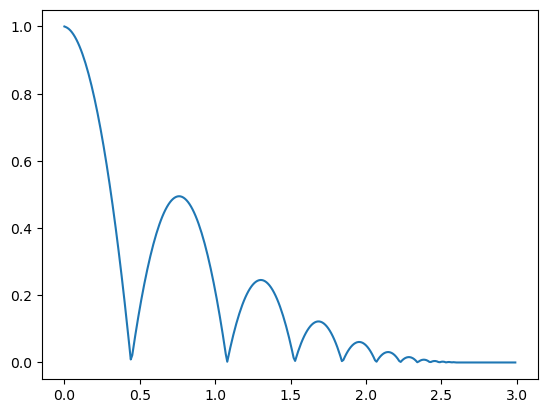

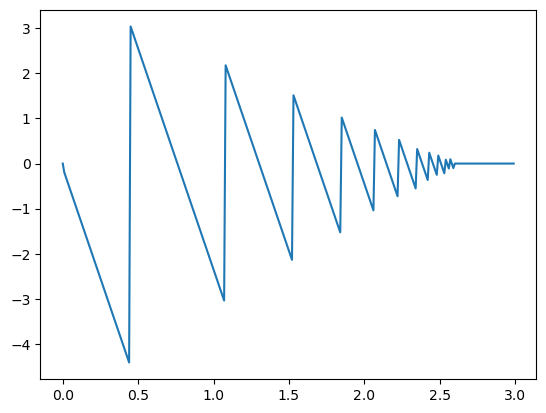

In [7]:
time_list, height_list, velocity_list = simulate_with_devs(step_size=1e-2)
plot_height_of_simulate_with_devs(time_list, height_list)
plot_velocity_of_simulate_with_devs(time_list, velocity_list)

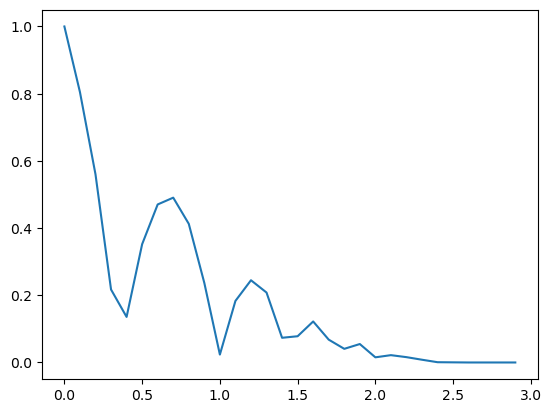

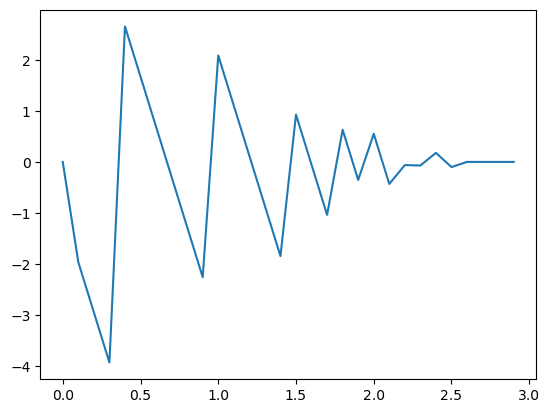

In [8]:
time_list, height_list, velocity_list = simulate_with_devs(step_size=1e-1)
plot_height_of_simulate_with_devs(time_list, height_list)
plot_velocity_of_simulate_with_devs(time_list, velocity_list)

In [9]:
def change_state(m):
    m.set_height(1)
    m.set_velocity(0)


def simulate_with_devs_with_event():
    simulator.reset()
    m = BouncingBall(fmu_path)
    
    simulator.schedule(
        timedelta(seconds=1),
        change_state,
        m
    )
        
    step_size = 1e-2
    time_list = np.arange(0, 3, step_size)
    height_list = []
    velocity_list = []
    
    for time in time_list:
        height_list.append(m.get_height())
        velocity_list.append(m.get_velocity())
        simulator.advance(timedelta(seconds=step_size))
    
    return time_list, height_list, velocity_list

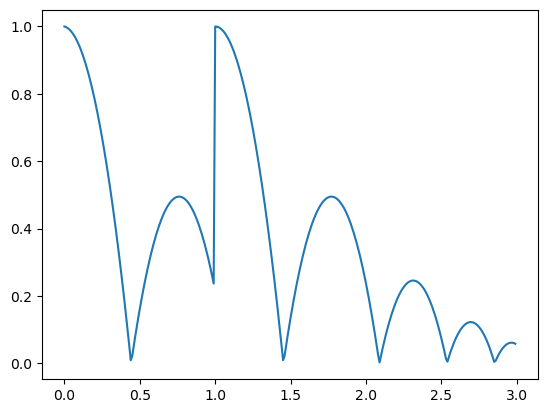

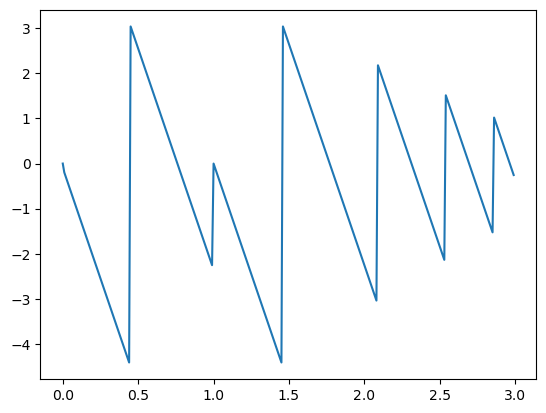

In [10]:
time_list, height_list, velocity_list = simulate_with_devs_with_event()
plot_height_of_simulate_with_devs(time_list, height_list)
plot_velocity_of_simulate_with_devs(time_list, velocity_list)